# Sorting Algorithms

The problem of sorting is an ideal problem to introduce many concepts of fundamental algorithm design. Some good reasons to study sorting are:

* sorting is used by many applications,

* sorting is the (first) step of many algorithms,

* many techniques can be illustrated by studying sorting.

For us the last reason is most important. In particular, sorting allows us to study the algorithmic techniques that we have seen for the searching problem on a more complex algorithmic problem. In the following I give an overview of the sorting algorithms discussed in the course. Before I do so, let me define the swap routine that is used by many of the sorting algorithms.

In [1]:
# imports
import random
import timeit
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
# takes in an array and swaps the values in index i and j
def swap(A, i, j):
    temp = A[i]
    A[i] = A[j]
    A[j] = temp    

In [3]:
#example
A = [1,2,3]
swap(A,0,1)
print A

[2, 1, 3]


# Part 1: Introducing Selection Sort, Insertion Sort, Merge Sort and Quicksort

## 1.1 Selection Sort

The selection sort looks for the largest value as it makes a pass and, after completing the pass, places it in the proper location. As such, after the first pass, the largest item is in the correct place. After the second pass, the next largest is in place. This process continues and requires n−1 passes to sort n items, since the final item must be in place after the (n−1) st pass.

In [4]:
def selection_sort(A):
    n = len(A)
    for i in range(n):
        smallest = i
        for j in range(i+1 , n):
            if A[j] < A[smallest]: 
                smallest = j
        swap(A, smallest, i )

In [5]:
#Example
A = [5,2,8,6]
selection_sort(A)
print(A)

[2, 5, 6, 8]


### Selection Sort Runtime
Selecting the minimum requires scanning $n$ elements (taking $n-1$ comparisons) and then swapping it into the first position. Finding the next lowest element requires scanning the remaining $n-1$ elements and so on. Therefore, the total number of comparisons is $\sum_{i=1}^{n-1}i = \frac{1}{2}(n^2 - n)$ which is of complexity $O(n^2)$

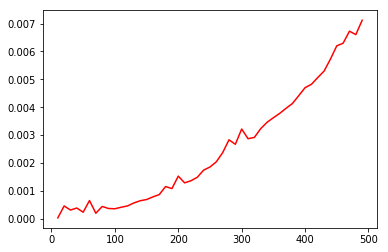

In [6]:
def selection_sort_runtime(N):
    numbers_to_sort= []
    runtime = []
    for i in range(10,N,10):
        sample = random.sample(range(1, 1000000), i)
        numbers_to_sort.append(i)
        startTime = timeit.default_timer()
        #runtime.append(timeit.timeit(lambda: selection_sort(sample)))
        selection_sort(sample)
        stopTime = timeit.default_timer()
        runtime.append(stopTime-startTime)
    plt.plot(numbers_to_sort,runtime,'r')
    plt.show()

selection_sort_runtime(500)  

## 1.2 Insertion Sort

Insertion sort is an *incremental algorithm*. That means that it incrementally computes the solution for an increasing subset of the input. Specifically it sorts the subarray $A[0..i-1]$ for increasing $i$. While Insertion Sort is slow asymptotically, it is fast for small input.

In [7]:
def insertion_sort(A):
    n = len(A)
    # at the beginning of the j-th iteration the subarray A[0..j-1] is sorted
    for j in range(1,n):
        key = A[j]
        i = j -1
        while i >= 0 and A[i] > key:
            A[i+1] = A[i]
            i = i -1
        A[i+1] = key


In [8]:
#example
A = [5,2,8,6]
#A = random.sample(range(1, 100000), 100)
#A= range(1000,1,-1)
print insertion_sort(A)
print(A)

None
[2, 5, 6, 8]


### Insertion Sort Runtime
The best case input is an array that is already sorted. In this case insertion sort has a $O(n)$ running time. The simplest worst case input is an array sorted in reverse order. The set of all worst case inputs consists of all arrays where each element is the smallest or second-smallest of the elements before it. In these cases every iteration of the inner loop will scan and shift the entire sorted subsection of the array before inserting the next element. This gives insertion sort a $O(n^2)$ running time. 

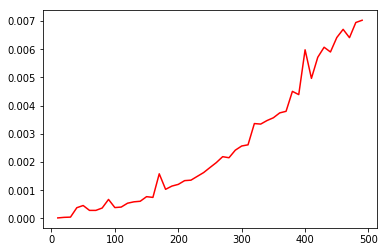

In [9]:
def insertion_sort_runtime(N):
    numbers_to_sort= []
    runtime = []
    for i in range(10,N,10):
        sample = random.sample(range(1, 1000000), i)
        numbers_to_sort.append(i)
        startTime = timeit.default_timer()
        #runtime.append(timeit.timeit(lambda: selection_sort(sample)))
        insertion_sort(sample)
        stopTime = timeit.default_timer()
        runtime.append(stopTime-startTime)
    plt.plot(numbers_to_sort,runtime,'r')
    plt.show()

insertion_sort_runtime(500)

## 1.3 Merge Sort
Merge Sort is an example of a recursive *divide&conquer* algorithm. A divide&conquer algorithm divides the problem into smaller subproblems, solves the subproblems recursively, and then combines the solutions to the subproblems. 

In [10]:
def merge_sort(A):
    n = len(A)
    if n>1:
        mid = n//2
        A1 = A[:mid]
        A2 = A[mid:]
        # recursive calls:
        merge_sort(A1)
        merge_sort(A2)
        # merge solutions
        i=0
        j=0
        while i<mid and mid+j<n:
            if A1[i]<A2[j]:
                A[i+j]=A1[i]
                i+=1
            else:
                A[i+j]=A2[j]
                j+=1
        
        while i<mid:
            A[i+j]=A1[i]
            i+=1
            
        while mid+j<n:
            A[i+j]=A2[j]
            j+=1


In [11]:
       
A = [5,2,8,6]
merge_sort(A)
print(A)

[2, 5, 6, 8]


### Merge Sort Runtime
In sorting $n$ objects, merge sort has an average and worst-case performance of $O(n log n)$. Variants of merge sort are primarily concerned with reducing the space complexity and the cost of copying.

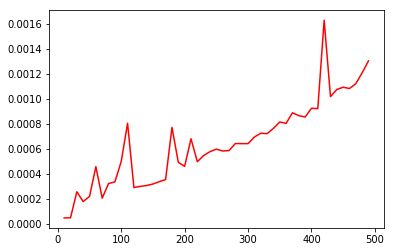

In [12]:
def merge_sort_runtime(N):
    numbers_to_sort= []
    runtime = []
    for i in range(10,N,10):
        sample = random.sample(range(1, 1000000), i)
        numbers_to_sort.append(i)
        startTime = timeit.default_timer()
        #runtime.append(timeit.timeit(lambda: selection_sort(sample)))
        merge_sort(sample)
        stopTime = timeit.default_timer()
        runtime.append(stopTime-startTime)
    plt.plot(numbers_to_sort,runtime,'r')
    plt.show()

merge_sort_runtime(500)

## 1.4 Quicksort
Quicksort is a divide and conquer algorithm. Quicksort first divides a large array into two smaller sub-arrays: the low elements and the high elements. Quicksort can then recursively sort the sub-arrays.

In [13]:
def partition(A, p, r):
    x = A[r]
    i = p-1
    for j in range(p,r):
        if A[j] <= x: 
            i+=1
            swap(A, i, j)
    swap(A, i+1, r)
    return  i+1

def quick_sort(A, p=0, r=None):
    if r==None: r=len(A)-1
    if p<r:
        q = partition(A, p, r)
        quick_sort(A, p, q-1)
        quick_sort(A, q+1, r)

In [14]:
# example
        
A = [5,2,8,6,7]
quick_sort(A)
print(A)

[2, 5, 6, 7, 8]


### Quicksort Runtime
To sort an array of n distinct elements, quicksort takes $O(n log n)$ time in expectation, averaged over all $n!$ permutations of $n$ elements with equal probability. The most unbalanced partition occurs when one of the sublists returned by the partitioning routine is of size $n − 1$. If this happens repeatedly in every partition, then each recursive call processes a list of size one less than the previous list. This means that the call tree is a linear chain of $n − 1$ nested calls, which means in the worst case Quicksort takes O(n²) time.

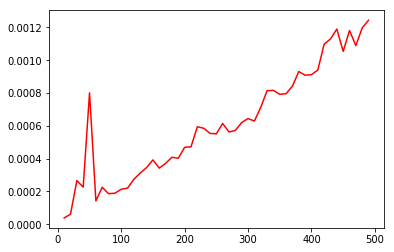

In [15]:
def quick_sort_runtime(N):
    numbers_to_sort= []
    runtime = []
    for i in range(10,N,10):
        sample = random.sample(range(1, 1000000), i)
        numbers_to_sort.append(i)
        startTime = timeit.default_timer()
        #runtime.append(timeit.timeit(lambda: selection_sort(sample)))
        quick_sort(sample)
        stopTime = timeit.default_timer()
        runtime.append(stopTime-startTime)
    plt.plot(numbers_to_sort,runtime,'r')
    plt.show()

quick_sort_runtime(500)

# Part 2: Runtime Comparison In Different Scenarios

We have shown the performance of the algorithms on a random data set - but we now investigate the runtimes when we know more about the input.

## 2.1 Fully Random Data

How do you think different sorting algorithms compare when the input is randomly generated data? Think about this and then try it below.


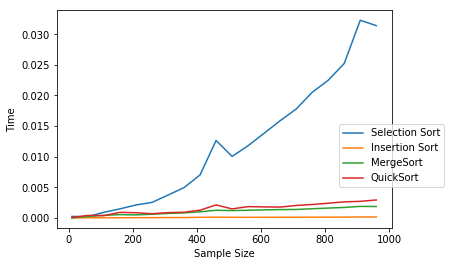

In [38]:
def visual_runtime(N):

    numbers_to_sort= []
    selection_runtime = []
    insertion_runtime = []
    merge_runtime=[]
    quick_runtime=[]
    for i in range(10,N,N/20):
        sample = random.sample(range(1, 1000000), i)
        numbers_to_sort.append(i)
        
                
        #quick sort
        startTime4 = timeit.default_timer()
        quick_sort(sample)
        stopTime4 = timeit.default_timer()
        quick_runtime.append(stopTime4-startTime4)
        
        #selection sort
        startTime1 = timeit.default_timer()
        selection_sort(sample)
        stopTime1 = timeit.default_timer()
        selection_runtime.append(stopTime1-startTime1)
        
        #Insertion sort
        startTime2 = timeit.default_timer()
        insertion_sort(sample)
        stopTime2 = timeit.default_timer()
        insertion_runtime.append(stopTime2-startTime2)
        
        #Merge Sort
        startTime3 = timeit.default_timer()
        merge_sort(sample)
        stopTime3 = timeit.default_timer()
        merge_runtime.append(stopTime3-startTime3)
        

        
    plt.plot(numbers_to_sort,selection_runtime,label="Selection Sort")
    plt.plot(numbers_to_sort,insertion_runtime,label="Insertion Sort")
    plt.plot(numbers_to_sort,merge_runtime,label="MergeSort")
    plt.plot(numbers_to_sort,quick_runtime,label="QuickSort")

    plt.xlabel('Sample Size')
    plt.ylabel('Time')
    legend = plt.legend(loc='upper center', bbox_to_anchor=(1, 0.5))
    plt.show()

visual_runtime(1000) 

## 2.2 Sorted Input
Sorting already sorted input may seem redundant, but it illustrates the best, and worst case scenarios of some of the algorithms. 

* Which algorithm/s will perform best on sorted data?
* Which algorithm/s will perform worst on sorted data?

Answer these yourselves and try it below.

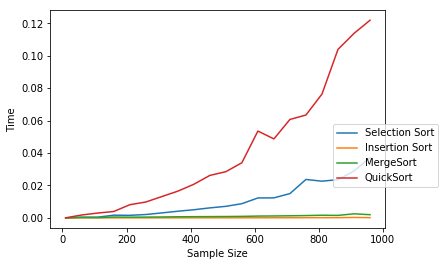

In [30]:
def visual_runtime_sorted(N):

    numbers_to_sort= []
    selection_runtime = []
    insertion_runtime = []
    merge_runtime=[]
    quick_runtime=[]
    for i in range(10,N,N/20):
        sample = list(range(i))
        numbers_to_sort.append(i)
        
        
        #quick sort
        startTime4 = timeit.default_timer()
        quick_sort(sample)
        stopTime4 = timeit.default_timer()
        quick_runtime.append(stopTime4-startTime4)
        
        #selection sort
        startTime1 = timeit.default_timer()
        selection_sort(sample)
        stopTime1 = timeit.default_timer()
        selection_runtime.append(stopTime1-startTime1)
        
        #Insertion sort
        startTime2 = timeit.default_timer()
        insertion_sort(sample)
        stopTime2 = timeit.default_timer()
        insertion_runtime.append(stopTime2-startTime2)
        
        #Merge Sort
        startTime3 = timeit.default_timer()
        merge_sort(sample)
        stopTime3 = timeit.default_timer()
        merge_runtime.append(stopTime3-startTime3)
        

        
    plt.plot(numbers_to_sort,selection_runtime,label="Selection Sort")
    plt.plot(numbers_to_sort,insertion_runtime,label="Insertion Sort")
    plt.plot(numbers_to_sort,merge_runtime,label="MergeSort")
    plt.plot(numbers_to_sort,quick_runtime,label="QuickSort")

    plt.xlabel('Sample Size')
    plt.ylabel('Time')
    legend = plt.legend(loc='upper center', bbox_to_anchor=(1, 0.5))
    plt.show()

visual_runtime_sorted(1000) 

## 2.3 Almost Sorted Input
In the real world we often get data that is 'almost' sorted, so it is useful to see how the algorithms perform on this data. Here we will put our initial sorted list through an algorithm to 'mix it up' before running our sorting tests.

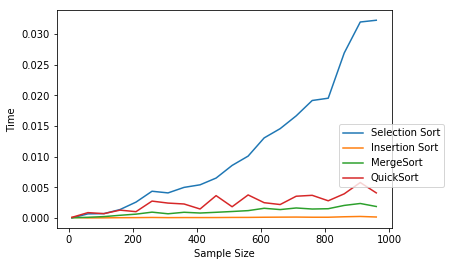

In [39]:
def mix_list(sortedList):
    size = len(sortedList)
    numSwaps = int(size/10) #20% of numbers will be swapped
    for i in range(1,numSwaps):
        swap1 = random.sample(range(0,size-1),1)
        swap2 = random.sample(range(0,size-1),1)
        swapVal = sortedList[swap1[0]]
        sortedList[swap1[0]] = sortedList[swap2[0]]
        sortedList[swap2[0]] = swapVal
        
    return sortedList

def visual_runtime_almost_sorted(N):

    numbers_to_sort= []
    selection_runtime = []
    insertion_runtime = []
    merge_runtime=[]
    quick_runtime=[]
    for i in range(10,N,N/20):
        sample = list(range(i))
        mixedSample = mix_list(sample)
        numbers_to_sort.append(i)
        
        
        #quick sort
        startTime4 = timeit.default_timer()
        quick_sort(mixedSample)
        stopTime4 = timeit.default_timer()
        quick_runtime.append(stopTime4-startTime4)
        
        #selection sort
        startTime1 = timeit.default_timer()
        selection_sort(mixedSample)
        stopTime1 = timeit.default_timer()
        selection_runtime.append(stopTime1-startTime1)
        
        #Insertion sort
        startTime2 = timeit.default_timer()
        insertion_sort(mixedSample)
        stopTime2 = timeit.default_timer()
        insertion_runtime.append(stopTime2-startTime2)
        
        #Merge Sort
        startTime3 = timeit.default_timer()
        merge_sort(mixedSample)
        stopTime3 = timeit.default_timer()
        merge_runtime.append(stopTime3-startTime3)
        

        
    plt.plot(numbers_to_sort,selection_runtime,label="Selection Sort")
    plt.plot(numbers_to_sort,insertion_runtime,label="Insertion Sort")
    plt.plot(numbers_to_sort,merge_runtime,label="MergeSort")
    plt.plot(numbers_to_sort,quick_runtime,label="QuickSort")

    plt.xlabel('Sample Size')
    plt.ylabel('Time')
    legend = plt.legend(loc='upper center', bbox_to_anchor=(1, 0.5))
    plt.show()

visual_runtime_almost_sorted(1000) 

## 2.4 Sorted in Reverse Order
Data is also found sorted in reverse order. 
* Which algorithms would deal with this situation well?
* Which algorithms would deal with this poorly?
* Can you think of a data structure that would allow this to be done in O(N) time?

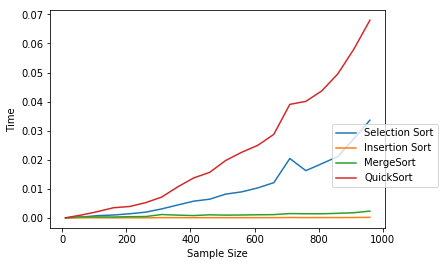

In [40]:
def visual_runtime_reverse_sorted(N):

    numbers_to_sort= []
    selection_runtime = []
    insertion_runtime = []
    merge_runtime=[]
    quick_runtime=[]
    for i in range(10,N,N/20):
        sample = list(reversed(range(i)))
        numbers_to_sort.append(i)
        
        
        #quick sort
        startTime4 = timeit.default_timer()
        quick_sort(sample)
        stopTime4 = timeit.default_timer()
        quick_runtime.append(stopTime4-startTime4)
        
        #selection sort
        startTime1 = timeit.default_timer()
        selection_sort(sample)
        stopTime1 = timeit.default_timer()
        selection_runtime.append(stopTime1-startTime1)
        
        #Insertion sort
        startTime2 = timeit.default_timer()
        insertion_sort(sample)
        stopTime2 = timeit.default_timer()
        insertion_runtime.append(stopTime2-startTime2)
        
        #Merge Sort
        startTime3 = timeit.default_timer()
        merge_sort(sample)
        stopTime3 = timeit.default_timer()
        merge_runtime.append(stopTime3-startTime3)
        

        
    plt.plot(numbers_to_sort,selection_runtime,label="Selection Sort")
    plt.plot(numbers_to_sort,insertion_runtime,label="Insertion Sort")
    plt.plot(numbers_to_sort,merge_runtime,label="MergeSort")
    plt.plot(numbers_to_sort,quick_runtime,label="QuickSort")

    plt.xlabel('Sample Size')
    plt.ylabel('Time')
    legend = plt.legend(loc='upper center', bbox_to_anchor=(1, 0.5))
    plt.show()

visual_runtime_reverse_sorted(1000) 